# **US Home Price Influencers Analysis.**

Find publicly available data for key factors that influence US home prices nationally. Afterward, construct a data science model that explains how these factors have impacted home prices over the last 20 years.

In [ ]:
# Importing necessary libraries for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading your dataset into a DataFrame
data = pd.read_csv('/content/HOME LC project.csv')

In [ ]:
# Hhandling missing values
data = data.dropna()

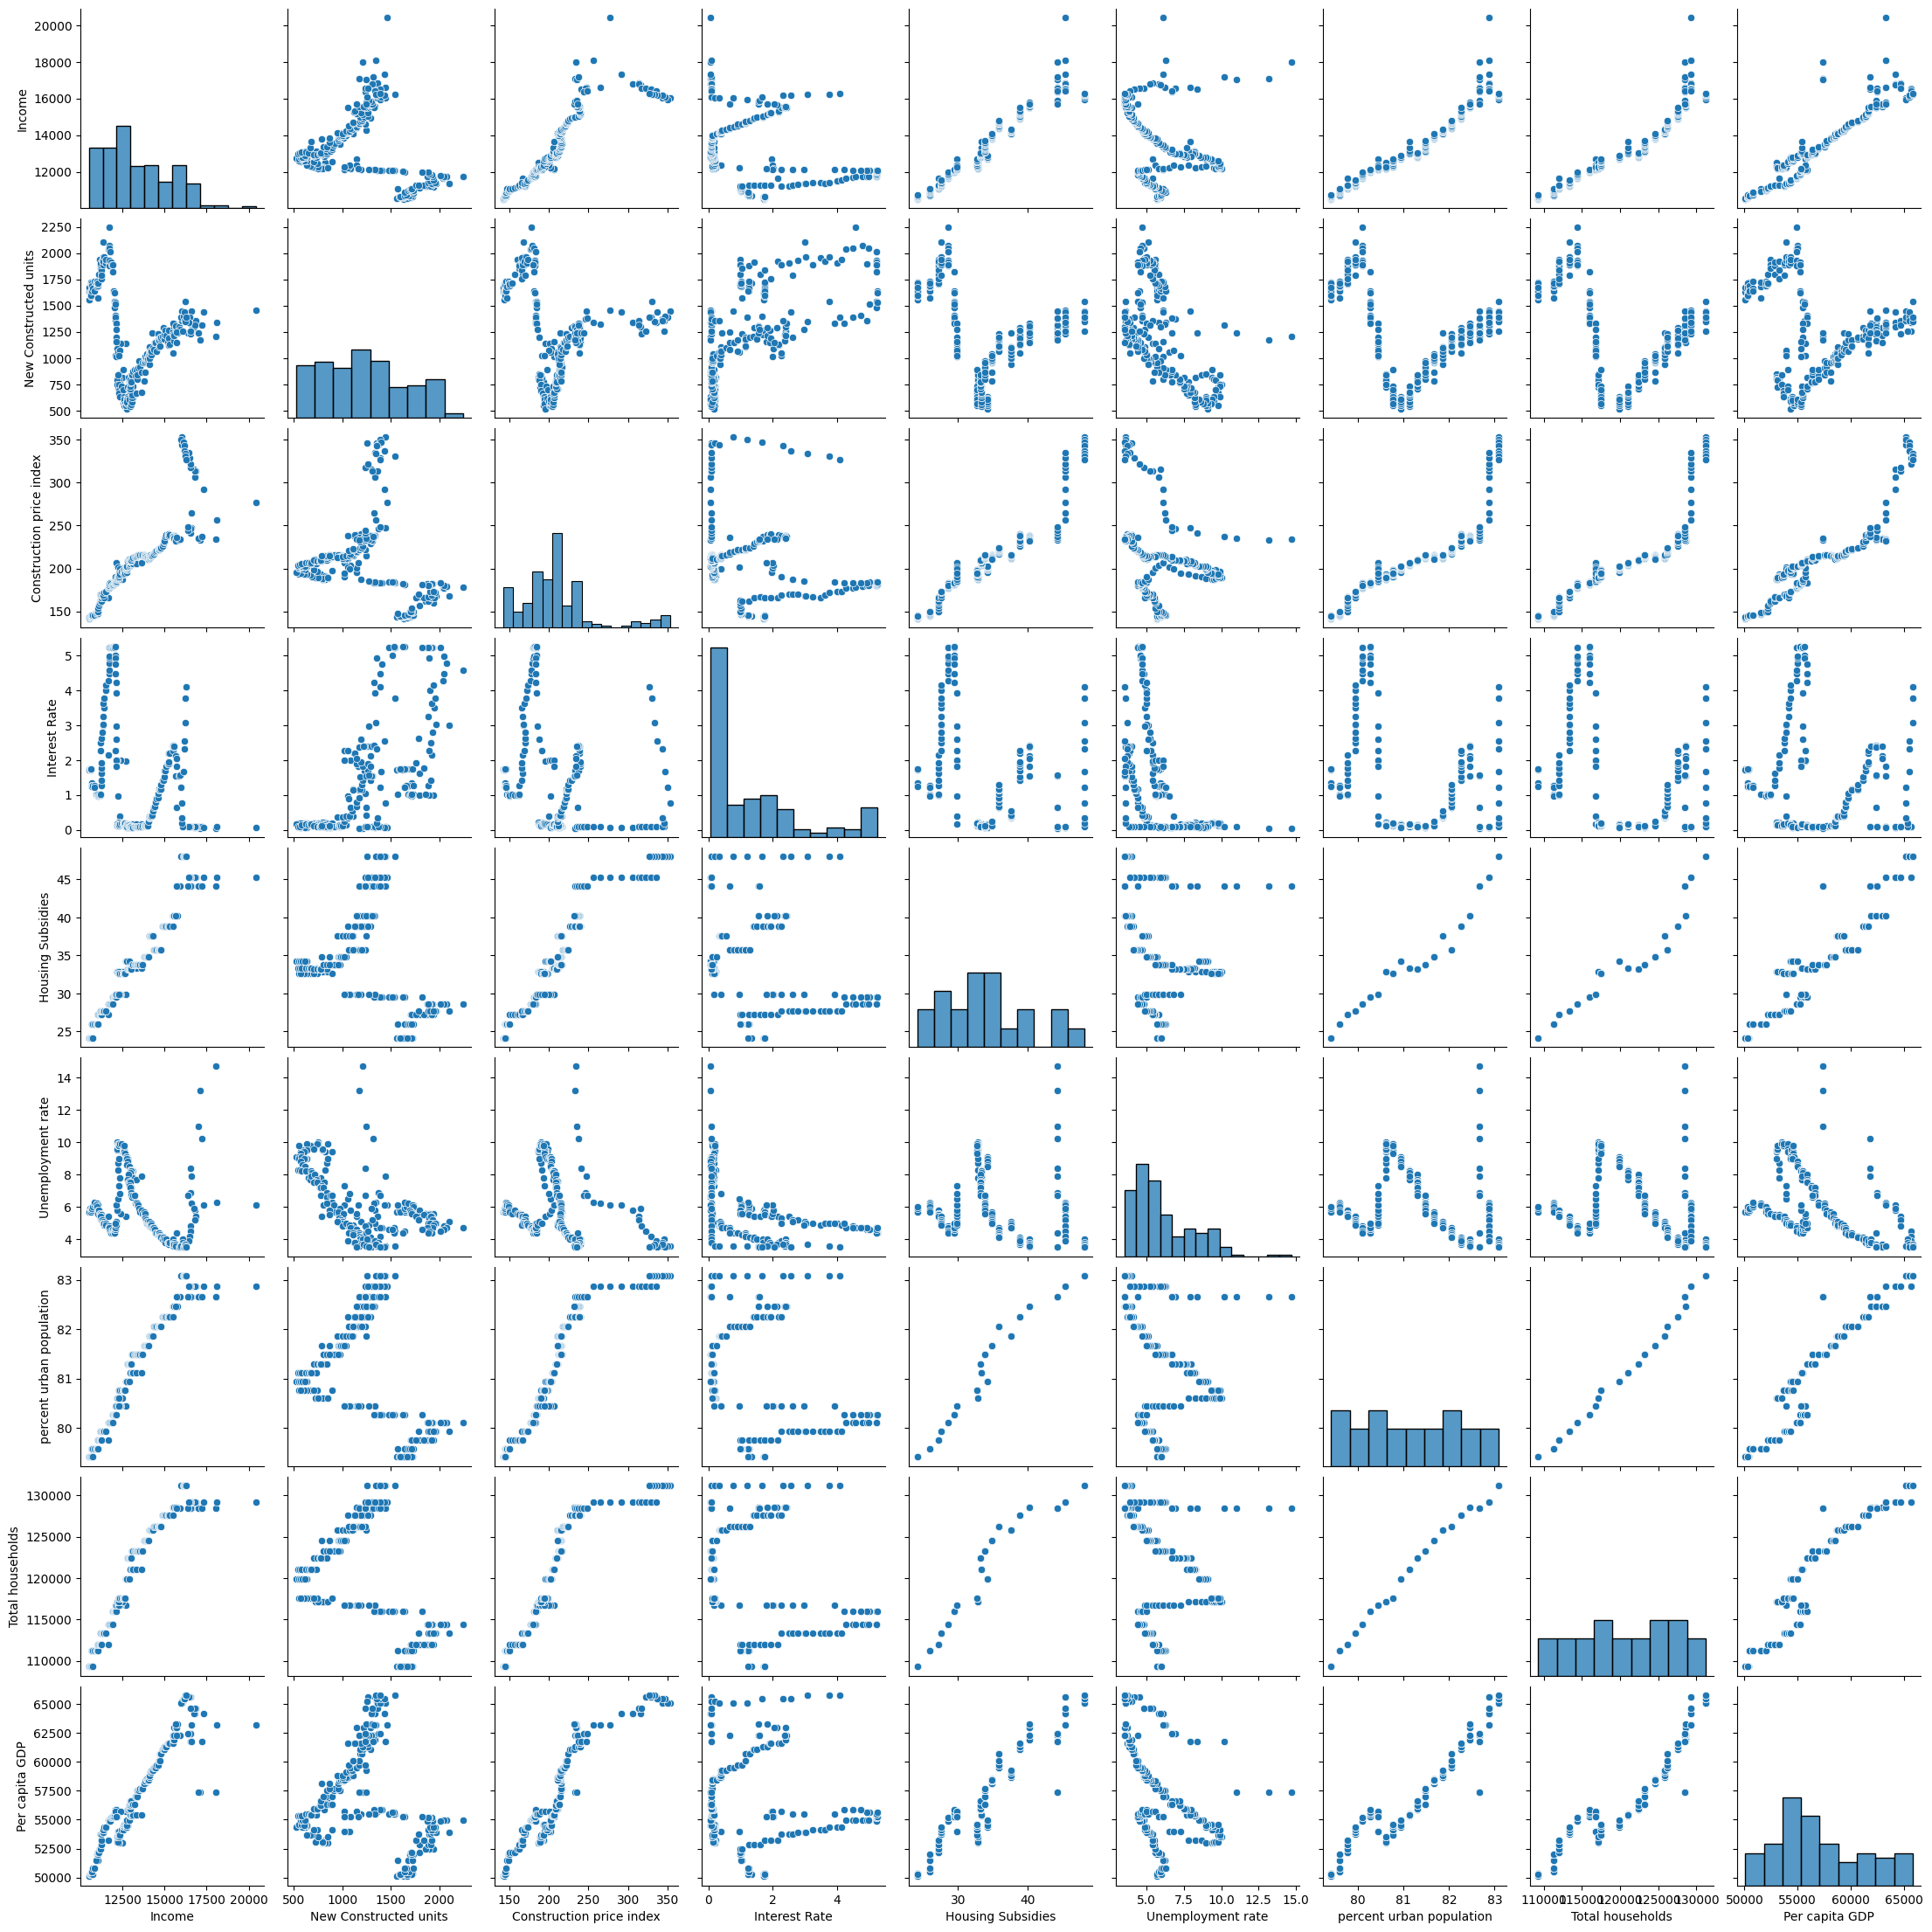

In [ ]:
# Creating a pairplot for scatter plots and histograms
sns.pairplot(data, vars=['Income', 'New Constructed units', 'Construction price index', 'Interest Rate', 'Housing Subsidies', 'Unemployment rate', 'percent urban population', 'Total households', 'Per capita GDP'], kind='scatter')
plt.show()

In [ ]:
# Creating a correlation matrix
correlation_matrix = data.corr()

<ipython-input-19-d01cc9d647dc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


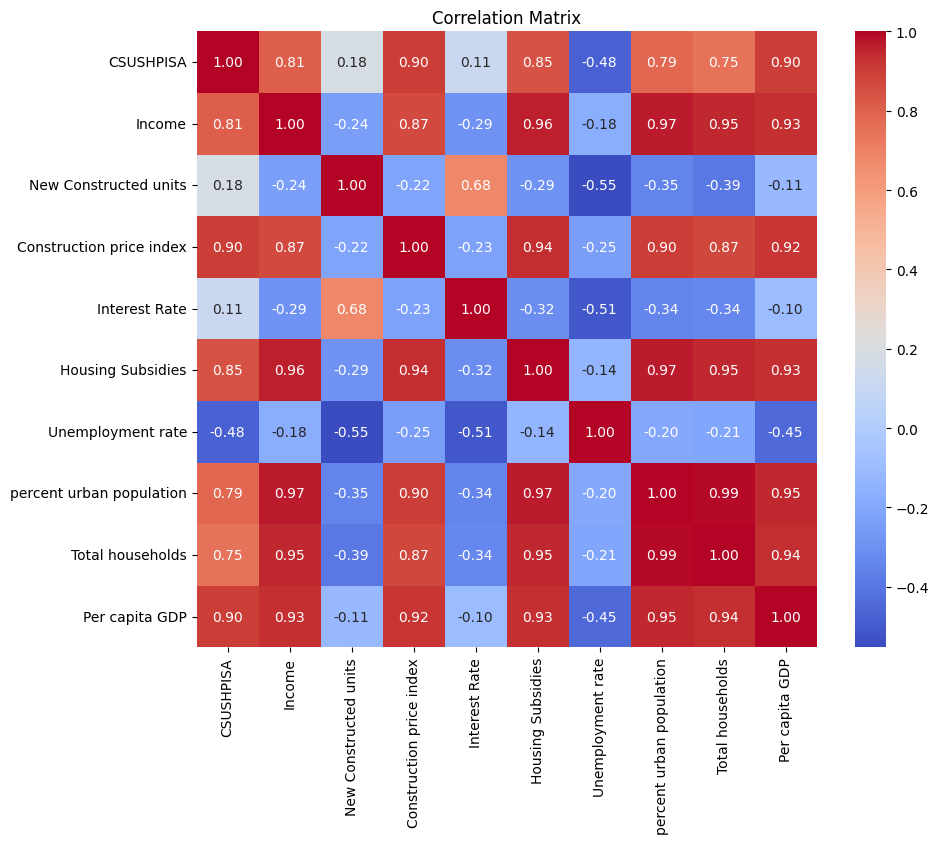

In [ ]:
# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

The Consumer Sentiment Index, which measures consumer confidence in the US. the financial sector. The index is positively correlated with house prices, which means that when consumers are more confident about the economy, they are more likely to buy a house, driving up prices

**Income**

Median household income is positively correlated with house prices. This is because people with more money can afford a more expensive home.

**Newly constructed units**

The amount of new construction is negatively correlated with house prices. This is because an increase in the supply of houses causes prices to fall.

**Construction Pricing**

The Construction Price Index measures the cost of building new homes. It is positively correlated with house prices, meaning that as construction costs rise, so do the prices of existing homes

**Interest rates**

Mortgage interest rates are negatively correlated with house prices. That’s because higher interest rates make it harder to borrow money to buy a home, which can weaken demand for homes and push prices down

**Housing subsidies**

Housing assistance is positively correlated with house prices. This is because subsidies can make it more expensive for people to buy homes, which can increase demand and push up prices.

**Unemployment rate**

Unemployment rates are negatively correlated with house prices. This is because when more people are unemployed, there is less demand for homes, which can push prices down.

**percentage of urban population**

Urban density is positively correlated with house prices. This is because there is a huge demand for housing in cities, which can push up prices.

**total households**

The total number of houses is positively correlated with house prices. This is because more homes means more demand for housing, which can push up prices.

**GDP per capita**

GDP per capita, which is economic growth per capita, is positively correlated with house prices. This is because people with higher incomes tend to buy homes, which can push up prices.




**Here are the new findings:**

The CSUSHPISA index has been rising for most of the last 20 years, suggesting that consumer confidence has been a key driver of home price growth

Median household incomes have also risen, which has helped support home price appreciation.

The volume of new construction was flat, which helped maintain supply and supported higher prices.

The Construction Price Index has risen, putting pressure on home prices.

Low mortgage interest rates have made it more attractive to borrow money to buy a home and have helped support higher prices

The unemployment rate is falling, which has increased demand for housing and helped support inflation.

The number of people living in urban areas is increasing, which has increased the demand for housing in urban areas and helped to drive up prices

Total households are increasing, which has increased demand for housing and helped push prices higher.

GDP per capita has increased, which has made it more affordable for people to buy houses and helped push up prices.

In [ ]:
# Creating interaction terms or polynomial features
data['Income_sq'] = data['Income'] ** 2

In [ ]:
# Importing the regression model
from sklearn.linear_model import LinearRegression

# Spliting the data into training and testing sets
from sklearn.model_selection import train_test_split

X = data[['Income', 'New Constructed units', 'Construction price index', 'Interest Rate', 'Housing Subsidies', 'Unemployment rate', 'percent urban population', 'Total households', 'Per capita GDP']]
y = data['CSUSHPISA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predictions on the test set
y_pred = model.predict(X_test)

# R-squared
r_squared = r2_score(y_test, y_pred)

# Mean Squared Error and Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


In [ ]:
# Coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

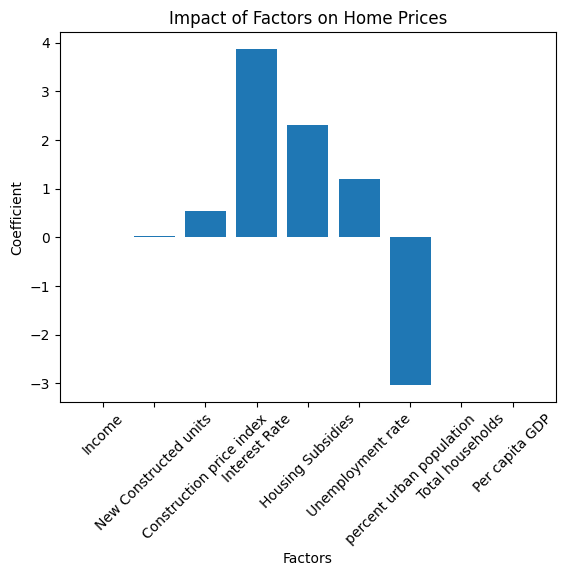

In [ ]:
#Bar plot to show the coefficients
plt.bar(X.columns, coefficients)
plt.xlabel('Factors')
plt.ylabel('Coefficient')
plt.title('Impact of Factors on Home Prices')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Printing the coefficients as numbers
for factor, coefficient in zip(X.columns, coefficients):
    print(f"{factor}: {coefficient}")

Income: -0.0009618553677543667
New Constructed units: 0.03131860102342461
Construction price index: 0.5327573836222628
Interest Rate: 3.8703396330944986
Housing Subsidies: 2.3067878982680736
Unemployment rate: 1.19460262522135
percent urban population: -3.030734364089706
Total households: -0.0002571022477571121
Per capita GDP: 0.002807668143882669


Several factors have affected house prices in India over the last two decades. Let’s take a closer look at how each of these factors affected the housing market this season:

1. **New construction (0.0313)**: New construction has had a small impact on home prices. Building more houses raises the supply slightly, which can raise prices slightly, but the effect is relatively small.

2. **Construction Price Index (0.5328)**: The Construction Price Index plays an important role in measuring the cost of construction materials and labor. When this index rises, construction costs rise, driving home prices higher as builders pass these costs on to buyers.

3. **Interest Rates (3.8703)**: Interest rates have had a significant impact on home prices. Higher interest rates make it more difficult to borrow money to buy a home, reducing demand and potentially causing inflation or deflation. In contrast, years of low interest rates stimulated demand and raised prices.

4. **Housing subsidies (2.3068)**: Government subsidies for housing have been a strong driver of house prices. This subsidy makes it more expensive for many people to own homes, increasing demand and consequently inflating prices.

5. **Unemployment rate (1.1946)**: The unemployment rate has had a slight positive effect on house prices. A falling unemployment rate generally indicates a healthy economy, boosting confidence in housing investment. However, extremely low unemployment rates can create labor shortages in construction, potentially driving up costs and prices.

6. **Percentage of urban population (-3.0307)**: House prices were negatively affected by the percentage of population living in urban areas. As urbanization increases, there is a huge demand for housing in cities, which can push up prices. Conversely, urban population decline can reduce the demand for urban goods, leading to higher or lower prices.

7. **Total households (-0.0003)**: The total number of households had a negligible effect on house prices. A slight decline in households may reduce housing demand and lower prices, but this effect is relatively small.

8. **GDP per capita (0.0028)**: GDP per capita, which measures the economic well-being of the society, had a positive impact on house prices. When people have higher incomes, they tend to invest more in real estate, which increases demand and drives up prices.